In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# read in the data
trials = pd.read_hdf('C:/Users/karam/Documents/GitHub/1-normalized-DS.hdf','trials')
eye_samples = pd.read_hdf('C:/Users/karam/Documents/GitHub/1-normalized-DS.hdf','eye_samples')

In [3]:
# update info based on trial_type codes
#trial_codes = {6101:'Novel', 6111: 'Novel Learning', 6102: 'Familiar', 6112: 'Familiar Learning'}
#trials['type'] = trials['trial_type'].map(trial_codes)

# remove initial trial_type columns
#del trials['trial_type']
#del eye_samples['trial_type']

In [4]:
# change session from an index to a column
trials = trials.reset_index(level = 'Session')
eye_samples = eye_samples.reset_index(level = 'Session')

In [5]:
# update column names
eye_samples = eye_samples.rename(columns = {'Pupils' : 'x', 'x' : 'y', 'y' : 'Pupils'})

In [6]:
trials.Session.unique() # verify what sessions are all included

array(['2019-02-01T15:03:00.000000000', '2019-02-01T16:08:00.000000000',
       '2018-12-03T12:52:00.000000000', '2018-12-03T13:15:00.000000000',
       '2018-12-05T13:06:00.000000000', '2018-12-07T09:21:00.000000000',
       '2018-12-07T10:10:00.000000000', '2018-12-07T11:15:00.000000000',
       '2018-11-09T15:21:00.000000000', '2018-11-12T16:19:00.000000000',
       '2018-11-12T16:25:00.000000000', '2018-11-12T16:31:00.000000000',
       '2018-11-13T15:01:00.000000000', '2018-12-13T10:54:00.000000000',
       '2018-12-13T11:02:00.000000000', '2018-12-13T11:44:00.000000000',
       '2018-12-13T12:57:00.000000000', '2019-01-14T14:44:00.000000000',
       '2019-01-14T16:21:00.000000000', '2018-11-14T15:35:00.000000000',
       '2018-11-14T16:09:00.000000000', '2019-01-15T14:28:00.000000000',
       '2019-01-15T16:16:00.000000000', '2018-11-15T15:32:00.000000000',
       '2018-11-15T15:34:00.000000000', '2019-01-16T14:29:00.000000000',
       '2018-11-16T15:35:00.000000000', '2018-11-16

In [7]:
print(trials.Session.unique().size) # total number of sessions
trials["VNS"] = np.nan # add column for VNS info
trials

75


,Session,fixation_required,fractals,good_trials,target_amplitude,target_angle,time_fp_off,time_outcome,time_target_on,trial_type,type,t0,VNS
Trial,,,,,,,,,,,,,
0,2019-02-01 15:03:00,1,6212,1,10,0,2.041627,4.539041,1.541559,6112,Familiar Learning,7.000005e+06,NaN
1,2019-02-01 15:03:00,1,6202,1,10,0,2.027416,4.522012,1.519004,6102,Familiar,7.000014e+06,NaN
2,2019-02-01 15:03:00,1,6302,1,10,0,1.866344,4.361617,1.365954,6102,Familiar,7.000023e+06,NaN
3,2019-02-01 15:03:00,1,6212,1,10,180,1.868525,4.363784,1.368451,6112,Familiar Learning,7.000032e+06,NaN
4,2019-02-01 15:03:00,1,6202,1,10,180,1.872531,4.367683,1.372509,6102,Familiar,7.000040e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-01-31 16:11:00,1,6202,1,10,0,2.048566,4.551228,1.548390,6102,Familiar,6.921352e+06,NaN
490,2019-01-31 16:11:00,1,6101,1,10,180,2.096719,4.584201,1.588395,6101,Novel,6.921361e+06,NaN
491,2019-01-31 16:11:00,1,6212,1,10,180,3.479869,5.975469,2.979798,6112,Familiar Learning,6.921369e+06,NaN


In [45]:
vns_sessions = ['2019-01-22 15:10:00','2019-01-22 16:01:00','2019-01-23 15:38:00','2019-01-23 15:39:00','2019-01-29 16:02:00','2019-01-30 16:38:00','2019-02-01 15:03:00']
no_vns = ['2018-12-19 11:02:00','2018-12-19 11:31:00','2018-12-19 15:30:00','2018-12-19 15:57:00','2018-12-19 16:27:00','2018-12-19 17:24:00','2018-12-20 14:56:00','2018-12-20 15:55:00',
          '2018-12-20 16:57:00','2018-12-21 14:56:00','2019-01-14 14:44:00','2019-01-14 16:21:00','2019-01-15 14:28:00','2019-01-15 16:16:00','2019-01-16 14:29:00','2019-01-17 14:54:00',
          '2019-01-17 16:21:00','2019-01-18 14:22:00','2019-01-18 15:58:00','2019-01-22 14:41:00','2019-01-22 16:19:00','2019-01-23 14:31:00','2019-01-24 15:06:00','2019-01-29 14:42:00',
          '2019-01-30 14:59:00','2019-01-31 14:31:00','2019-01-31 16:11:00','2019-02-01 16:08:00']

# update VNS column to be 1 if stim on and 0 if stim off (still NaN if neither, i.e. date not included in book)
for date in vns_sessions:
    trials.loc[trials['Session'] == date, 'VNS'] = 1
    
for date in no_vns:
    trials.loc[trials['Session'] == date, 'VNS'] = 0
    
trials

,Session,fixation_required,fractals,good_trials,target_amplitude,target_angle,time_fp_off,time_outcome,time_target_on,trial_type,type,t0,VNS
Trial,,,,,,,,,,,,,
0,2019-02-01 15:03:00,1,6212,1,10,0,2.041627,4.539041,1.541559,6112,Familiar Learning,7.000005e+06,1.0
1,2019-02-01 15:03:00,1,6202,1,10,0,2.027416,4.522012,1.519004,6102,Familiar,7.000014e+06,1.0
2,2019-02-01 15:03:00,1,6302,1,10,0,1.866344,4.361617,1.365954,6102,Familiar,7.000023e+06,1.0
3,2019-02-01 15:03:00,1,6212,1,10,180,1.868525,4.363784,1.368451,6112,Familiar Learning,7.000032e+06,1.0
4,2019-02-01 15:03:00,1,6202,1,10,180,1.872531,4.367683,1.372509,6102,Familiar,7.000040e+06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-01-31 16:11:00,1,6202,1,10,0,2.048566,4.551228,1.548390,6102,Familiar,6.921352e+06,0.0
490,2019-01-31 16:11:00,1,6101,1,10,180,2.096719,4.584201,1.588395,6101,Novel,6.921361e+06,0.0
491,2019-01-31 16:11:00,1,6212,1,10,180,3.479869,5.975469,2.979798,6112,Familiar Learning,6.921369e+06,0.0


In [46]:
# sessions which are not listed in book
missing_data = pd.isnull(trials["VNS"])
missing_df = trials[missing_data]
missing_df.Session.unique()

array(['2018-12-03T12:52:00.000000000', '2018-12-03T13:15:00.000000000',
       '2018-12-05T13:06:00.000000000', '2018-12-07T09:21:00.000000000',
       '2018-12-07T10:10:00.000000000', '2018-12-07T11:15:00.000000000',
       '2018-11-09T15:21:00.000000000', '2018-11-12T16:19:00.000000000',
       '2018-11-12T16:25:00.000000000', '2018-11-12T16:31:00.000000000',
       '2018-11-13T15:01:00.000000000', '2018-12-13T10:54:00.000000000',
       '2018-12-13T11:02:00.000000000', '2018-12-13T11:44:00.000000000',
       '2018-12-13T12:57:00.000000000', '2018-11-14T15:35:00.000000000',
       '2018-11-14T16:09:00.000000000', '2018-11-15T15:32:00.000000000',
       '2018-11-15T15:34:00.000000000', '2018-11-16T15:35:00.000000000',
       '2018-11-16T16:44:00.000000000', '2018-11-16T17:11:00.000000000',
       '2018-12-18T13:36:00.000000000', '2018-11-19T15:46:00.000000000',
       '2018-11-19T16:39:00.000000000', '2018-11-19T16:46:00.000000000',
       '2018-11-20T15:28:00.000000000', '2018-11-20

In [47]:
# make 2 dataframes for VNS on and VNS off (pulling from the trials df)
vns_on = trials[trials['VNS'] == 1.0]
vns_off = trials[trials['VNS'] == 0.0]
vns_on

,Session,fixation_required,fractals,good_trials,target_amplitude,target_angle,time_fp_off,time_outcome,time_target_on,trial_type,type,t0,VNS
Trial,,,,,,,,,,,,,
0,2019-02-01 15:03:00,1,6212,1,10,0,2.041627,4.539041,1.541559,6112,Familiar Learning,7.000005e+06,1.0
1,2019-02-01 15:03:00,1,6202,1,10,0,2.027416,4.522012,1.519004,6102,Familiar,7.000014e+06,1.0
2,2019-02-01 15:03:00,1,6302,1,10,0,1.866344,4.361617,1.365954,6102,Familiar,7.000023e+06,1.0
3,2019-02-01 15:03:00,1,6212,1,10,180,1.868525,4.363784,1.368451,6112,Familiar Learning,7.000032e+06,1.0
4,2019-02-01 15:03:00,1,6202,1,10,180,1.872531,4.367683,1.372509,6102,Familiar,7.000040e+06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,2019-01-30 16:38:00,1,6711,0,10,180,-1.000000,NaN,NaN,6111,Novel Learning,6.836567e+06,1.0
523,2019-01-30 16:38:00,1,6711,1,10,180,2.062274,4.556632,1.553869,6111,Novel Learning,6.836570e+06,1.0
524,2019-01-30 16:38:00,1,6511,1,10,180,2.054452,4.557229,1.554379,6111,Novel Learning,6.836578e+06,1.0


In [48]:
vns_off

,Session,fixation_required,fractals,good_trials,target_amplitude,target_angle,time_fp_off,time_outcome,time_target_on,trial_type,type,t0,VNS
Trial,,,,,,,,,,,,,
0,2019-02-01 16:08:00,1,6312,1,10,180,2.086088,4.580836,1.585708,6112,Familiar Learning,7.003814e+06,0.0
1,2019-02-01 16:08:00,1,6202,1,10,180,1.872023,4.367026,1.371626,6102,Familiar,7.003823e+06,0.0
2,2019-02-01 16:08:00,1,6611,0,10,180,-1.000000,NaN,1.369097,6111,Novel Learning,7.003831e+06,0.0
3,2019-02-01 16:08:00,1,6611,1,10,180,2.034426,4.528809,1.525932,6111,Novel Learning,7.003835e+06,0.0
4,2019-02-01 16:08:00,1,6711,1,10,180,2.531154,5.025495,2.022575,6111,Novel Learning,7.003843e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-01-31 16:11:00,1,6202,1,10,0,2.048566,4.551228,1.548390,6102,Familiar,6.921352e+06,0.0
490,2019-01-31 16:11:00,1,6101,1,10,180,2.096719,4.584201,1.588395,6101,Novel,6.921361e+06,0.0
491,2019-01-31 16:11:00,1,6212,1,10,180,3.479869,5.975469,2.979798,6112,Familiar Learning,6.921369e+06,0.0


In [49]:
# count number of sessions with stim on and stim off
print(len(vns_sessions))
print(len(no_vns))

7
28


In [52]:
# make a dataframe for vns on (pulling from eye_samples df)
vns_on_eye = eye_samples[eye_samples['Session'] == vns_sessions[0]]

for x in range(1,7):
    add = eye_samples[eye_samples['Session'] == vns_sessions[x]]
    frames = [vns_on_eye,add]
    vns_on_eye = pd.concat(frames)

vns_on_eye

Session          x         y    Pupils
Trial t_trial                                                           
0     00:00:00        2019-01-22 15:10:00  -0.019531 -2.248535 -2.584229
      00:00:00.010000 2019-01-22 15:10:00   0.239258 -2.302246 -2.586060
      00:00:00.011000 2019-01-22 15:10:00   0.227051 -2.326660 -2.587585
      00:00:00.018000 2019-01-22 15:10:00   0.266113 -2.164714 -2.588196
      00:00:00.019000 2019-01-22 15:10:00   0.234375 -2.154541 -2.587051
...                                   ...        ...       ...       ...
507   00:00:01.989000 2019-02-01 15:03:00  -1.647949  0.656738 -1.716003
      00:00:01.990000 2019-02-01 15:03:00  -2.153320  0.549316 -1.706848
      00:00:01.997000 2019-02-01 15:03:00  -9.367676 -0.664062 -1.655884
      00:00:01.998000 2019-02-01 15:03:00 -10.471191 -0.839844 -1.651001
      00:00:02.006000 2019-02-01 15:03:00 -14.711914 -1.245117 -1.670532

[5570803 rows x 4 columns]

In [53]:
vns_on_eye.Session.unique()

array(['2019-01-22T15:10:00.000000000', '2019-01-22T16:01:00.000000000',
       '2019-01-23T15:38:00.000000000', '2019-01-23T15:39:00.000000000',
       '2019-01-29T16:02:00.000000000', '2019-01-30T16:38:00.000000000',
       '2019-02-01T15:03:00.000000000'], dtype='datetime64[ns]')

In [54]:
# make a dataframe for vns off (pulling from eye_samples df)
vns_off_eye = eye_samples[eye_samples['Session'] == no_vns[0]]

for x in range(1,28):
    add = eye_samples[eye_samples['Session'] == no_vns[x]]
    frames = [vns_off_eye, add]
    vns_off_eye = pd.concat(frames)
    
vns_off_eye

Session          x          y    Pupils
Trial t_trial                                                            
0     00:00:00        2018-12-19 11:02:00  -8.708496  -1.643066 -3.664551
      00:00:00.011000 2018-12-19 11:02:00  -8.815918  -1.623535 -3.683472
      00:00:00.012000 2018-12-19 11:02:00  -8.776855  -1.589355 -3.678589
      00:00:00.013000 2018-12-19 11:02:00  -8.776855  -1.577148 -3.677979
      00:00:00.020000 2018-12-19 11:02:00  -8.891602  -1.594238 -3.689779
...                                   ...        ...        ...       ...
518   00:00:06.547000 2019-02-01 16:08:00  37.631836  34.927572 -1.739705
      00:00:06.548000 2019-02-01 16:08:00  37.622070  34.907227 -1.739502
      00:00:06.555000 2019-02-01 16:08:00  37.797852  34.868164 -1.730652
      00:00:06.556000 2019-02-01 16:08:00  37.784831  34.961751 -1.729635
      00:00:06.563000 2019-02-01 16:08:00  37.827148  35.043945 -1.714172

[16119487 rows x 4 columns]

In [55]:
vns_off_eye.Session.unique()

array(['2018-12-19T11:02:00.000000000', '2018-12-19T11:31:00.000000000',
       '2018-12-19T15:30:00.000000000', '2018-12-19T15:57:00.000000000',
       '2018-12-19T16:27:00.000000000', '2018-12-19T17:24:00.000000000',
       '2018-12-20T14:56:00.000000000', '2018-12-20T15:55:00.000000000',
       '2018-12-20T16:57:00.000000000', '2018-12-21T14:56:00.000000000',
       '2019-01-14T14:44:00.000000000', '2019-01-14T16:21:00.000000000',
       '2019-01-15T14:28:00.000000000', '2019-01-15T16:16:00.000000000',
       '2019-01-16T14:29:00.000000000', '2019-01-17T14:54:00.000000000',
       '2019-01-17T16:21:00.000000000', '2019-01-18T14:22:00.000000000',
       '2019-01-18T15:58:00.000000000', '2019-01-22T14:41:00.000000000',
       '2019-01-22T16:19:00.000000000', '2019-01-23T14:31:00.000000000',
       '2019-01-24T15:06:00.000000000', '2019-01-29T14:42:00.000000000',
       '2019-01-30T14:59:00.000000000', '2019-01-31T14:31:00.000000000',
       '2019-01-31T16:11:00.000000000', '2019-02-01

In [58]:
# choose a session to look at
sess = vns_on_eye[vns_on_eye['Session'] == '2019-01-23 15:39:00']
print(len(sess.groupby(level = 0)))
sess

497


Session         x         y    Pupils
Trial t_trial                                                          
0     00:00:00        2019-01-23 15:39:00  2.839355 -2.443848 -2.398987
      00:00:00.030000 2019-01-23 15:39:00  2.805176 -2.692871 -2.402039
      00:00:00.034000 2019-01-23 15:39:00  2.700195 -2.629395 -2.413635
      00:00:00.043000 2019-01-23 15:39:00  2.685547 -2.304688 -2.410126
      00:00:00.044000 2019-01-23 15:39:00  2.683105 -2.277832 -2.411499
...                                   ...       ...       ...       ...
496   00:00:01.047000 2019-01-23 15:39:00  3.907064 -1.649577 -1.499939
      00:00:01.048000 2019-01-23 15:39:00  3.908691 -1.665039 -1.499329
      00:00:01.054000 2019-01-23 15:39:00  4.028320 -1.345215 -1.496887
      00:00:01.055000 2019-01-23 15:39:00  3.955078 -1.337891 -1.501160
      00:00:01.063000 2019-01-23 15:39:00  3.952637 -1.218262 -1.490784

[838134 rows x 4 columns]

In [60]:
# get info on a particular trial from that session
vns_on.Session.unique()
vns_on[vns_on['Session'] == '2019-01-23 15:39:00'].loc[100]

Session              2019-01-23 15:39:00
fixation_required                      1
fractals                            6411
good_trials                            1
target_amplitude                      10
target_angle                         180
time_fp_off                      1.87215
time_outcome                     4.36737
time_target_on                   1.37208
trial_type                          6111
type                      Novel Learning
t0                           6.22534e+06
VNS                                    1
Name: 100, dtype: object

2486


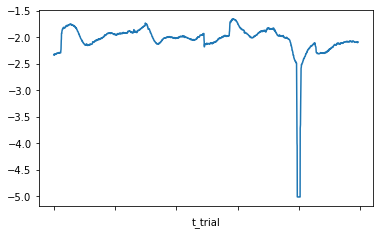

In [61]:
# plot a trial from the chosen session, 'sess'
pupils = sess['Pupils']
pupils.loc[100].plot()
print(len(sess['Pupils'].loc[100]))

In [ ]:
# loop through every session and every trial of vns on
# find any blink (defined as <= -4.7, and change it to NaN)
#for date in vns_sessions:
trial_count = 0
curr_sess = vns_on_eye[vns_on_eye['Session'] == '2019-01-23 15:39:00']['Pupils']
for t in range(0,len(curr_sess.groupby(level = 0))):
    trial_count = trial_count + 1
    if (trial_count % 25 == 0):
        print(trial_count)
    for pupil in range(0,len(curr_sess.loc[t])):
        if (curr_sess.loc[t][pupil] <= -4.7):
            curr_sess.loc[t][pupil] = np.nan
vns_on_eye[vns_on_eye['Session'] == date]['Pupils'] = curr_sess
print(trial_count)

In [84]:
#current = vns_on_eye[vns_on_eye['Session'] == '2019-01-23 15:39:00']['Pupils']
#current
#len(current.groupby(level = 0))
#len(current.loc[100])
#current.loc[100][1000] = np.nan
#current.loc[100][1000]
#current.isna().sum()

In [67]:
pupils = vns_on_eye[vns_on_eye['Session'] == '2019-01-23 15:39:00']['Pupils']
pupils

Trial  t_trial        
0      00:00:00          -2.398987
       00:00:00.030000   -2.402039
       00:00:00.034000   -2.413635
       00:00:00.043000   -2.410126
       00:00:00.044000   -2.411499
                            ...   
496    00:00:01.047000   -1.499939
       00:00:01.048000   -1.499329
       00:00:01.054000   -1.496887
       00:00:01.055000   -1.501160
       00:00:01.063000   -1.490784
Name: Pupils, Length: 838134, dtype: float64

In [69]:
pupils.loc[100][4]

-2.3260498046875

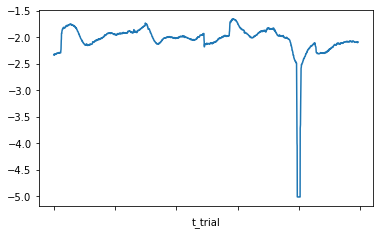

In [66]:
pupils.plot()